<a href="https://colab.research.google.com/github/farheen2203/Gender-Recognition-by-voice/blob/master/FineGrainClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path=untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
img_path=path/'images'
anno_path=path/'annotations'

In [11]:
fnames=get_image_files(img_path)
fnames[:5]
 
 

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_98.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_78.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_81.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_223.jpg')]

In [0]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$'

In [0]:
data=ImageDataBunch.from_name_re(img_path,fnames,pat,valid_pct=.2,bs=32,size=299,ds_tfms=get_transforms()).normalize(imagenet_stats)

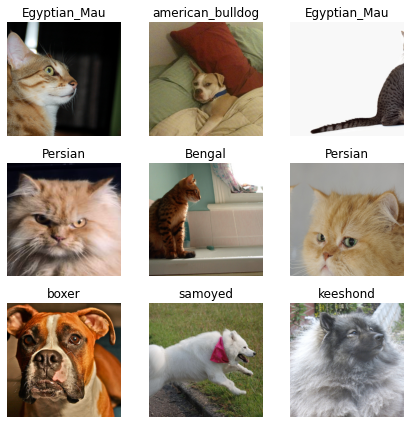

In [14]:
data.show_batch(3,figsize=(6,6))

In [15]:
learn=cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [16]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


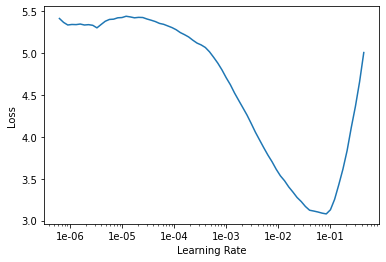

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.734353,0.365449,0.117050,02:16
1,0.490347,0.336195,0.099459,02:15
2,0.434285,0.257223,0.083221,02:13
3,0.338067,0.230441,0.068336,02:13
4,0.296293,0.234772,0.079161,02:11
5,0.165517,0.208348,0.064276,02:13
6,0.129203,0.198204,0.061570,02:14
7,0.111904,0.206147,0.062246,02:13


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(3,max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.111174,0.193090,0.058863,02:23
1,0.121455,0.194978,0.062923,02:25
2,0.085985,0.187140,0.061570,02:24


In [0]:
learn.save('stage-2')

In [23]:
interp=ClassificationInterpretation.from_learner(learn)

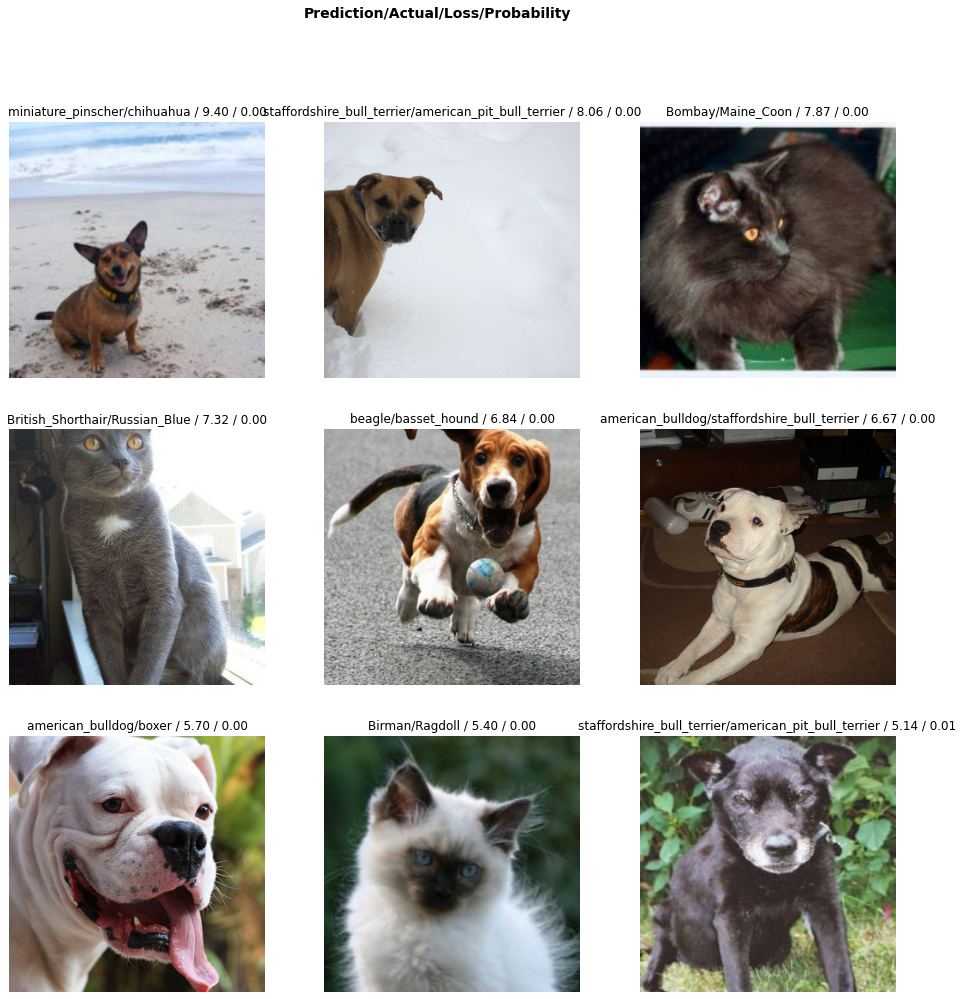

In [28]:
interp.plot_top_losses(9,figsize=(16,16))

In [30]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('boxer', 'american_bulldog', 3),
 ('Ragdoll', 'Persian', 2),
 ('Siamese', 'Birman', 2),
 ('basset_hound', 'beagle', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('havanese', 'wheaten_terrier', 2),
 ('staffordshire_bull_terrier', 'boxer', 2)]